# Graph with created edges

In [1]:
import pandas as pd

In [2]:
boardex_data = pd.read_csv("initial_datasets/boardex_sample_1000.csv")

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

# # Create a graph
# G = nx.Graph()

# # Adding nodes and edges based on directors' involvement in different boards
# for _, row in boardex_data.iterrows():
#     # Add nodes for director to board connections
#     G.add_node(row['Directorid'], label=row['Directorname'])
#     G.add_edge(row['Directorid'], row['Boardid'], board='Board')
#     G.add_edge(row['Directorid'], row['Companyid'], company='Company')

# # Draw the graph
# plt.figure(figsize=(12, 8))
# pos = nx.spring_layout(G, scale=2)
# nx.draw_networkx(G, pos, node_size=2, 
# with_labels=False, 
# font_weight='bold', node_color='lightblue')
# plt.title('Network Graph of Directors and Board Interlocks')
# plt.show()


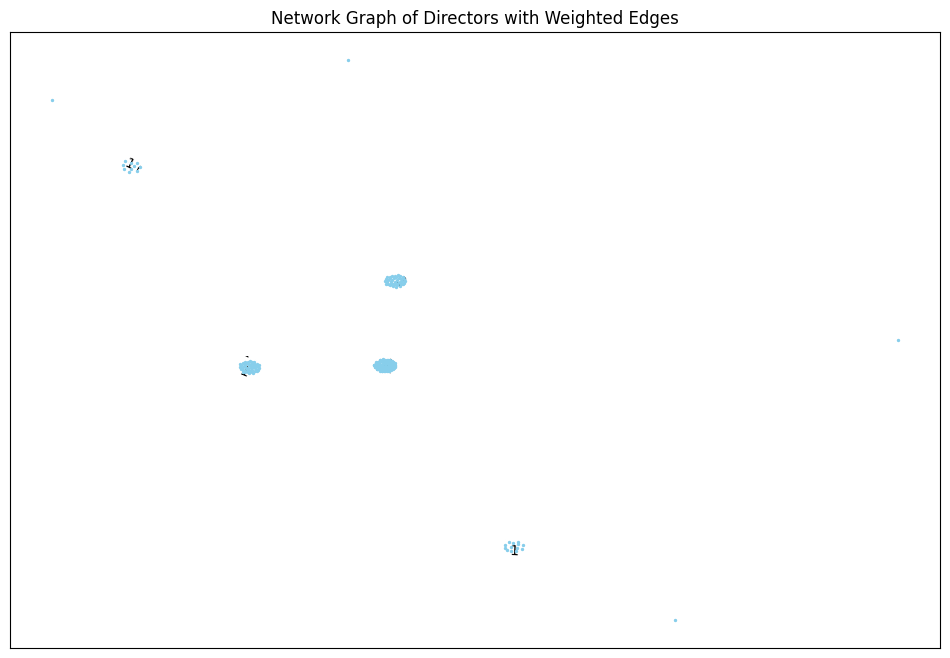

In [7]:

# Create a new graph
G_weighted = nx.Graph()

# Add nodes for each director
for director in boardex_data['Directorid'].unique():
    G_weighted.add_node(director)

# Adding edges with weights for shared boards between directors
for board in boardex_data['Boardid'].unique():
    # Get all directors for this board
    directors_on_board = boardex_data[boardex_data['Boardid'] == board]['Directorid'].unique()
    # Iterate through each pair of directors and add/update an edge, converting dataframe
    for i in range(len(directors_on_board)):
        for j in range(i + 1, len(directors_on_board)):
            director1 = directors_on_board[i]
            director2 = directors_on_board[j]
            # Check if edge exists and update weight, or create new edge with weight 1
            if G_weighted.has_edge(director1, director2):
                G_weighted[director1][director2]['weight'] += 1
            else:
                G_weighted.add_edge(director1, director2, weight=1)

# Draw the graph with weights shown
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G_weighted, scale=2)
nx.draw_networkx(G_weighted, pos, node_size=2, with_labels=False, font_weight='bold', node_color='skyblue')
edge_labels = nx.get_edge_attributes(G_weighted, 'weight')
nx.draw_networkx_edge_labels(G_weighted, pos, edge_labels=edge_labels)
plt.title('Network Graph of Directors with Weighted Edges')
plt.show()


In [10]:
import datetime

# Current year
current_year = datetime.datetime.now().year

# Function to handle 'Curr' and numeric conversion
def handle_year(value):
    if value == 'Curr':
        return current_year
    try:
        return int(value)
    except ValueError:
        return None

# Apply the function to the Overlapyearend column and ensure Overlapyearstart is int
boardex_data['Overlapyearend'] = boardex_data['Overlapyearend'].apply(handle_year)
boardex_data['Overlapyearstart'] = boardex_data['Overlapyearstart'].astype(int)

# Extract the range of years from the dataset
years = range(boardex_data['Overlapyearstart'].min(), boardex_data['Overlapyearend'].max() + 1)

# Initialize a dictionary to store adjacency matrices for each year
adjacency_matrices = {year: pd.DataFrame(0, index=boardex_data['Directorid'].unique(), columns=boardex_data['Directorid'].unique()) for year in years}

# Populate the adjacency matrices
for _, row in boardex_data.iterrows():
    active_years = range(row['Overlapyearstart'], row['Overlapyearend'] + 1)
    directors_on_board = boardex_data[(boardex_data['Boardid'] == row['Boardid']) & (boardex_data['Directorid'] != row['Directorid'])]['Directorid'].unique()
    for year in active_years:
        if year in adjacency_matrices:
            for director in directors_on_board:
                adjacency_matrices[year].loc[row['Directorid'], director] += 1
                adjacency_matrices[year].loc[director, row['Directorid']] += 1

# Let's check the adjacency matrix for one of the years to confirm the setup
adjacency_matrices[current_year]


,59796,1617025,540103,341582,341583,341621,341168,341132,341118,340871,...,607819,607817,1201398,1199573,1313362,1313364,1313363,1087055,1189057,1075985
59796,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1617025,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
540103,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
341582,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
341583,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1313364,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,8,0
1313363,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,8,0
1087055,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,0,10,2
1189057,0,0,0,0,0,0,0,0,0,0,...,8,8,8,8,8,8,8,10,0,8


In [13]:
adjacency_matrices[2007]

,59796,1617025,540103,341582,341583,341621,341168,341132,341118,340871,...,607819,607817,1201398,1199573,1313362,1313364,1313363,1087055,1189057,1075985
59796,0,5,7,6,5,7,5,6,5,5,...,0,0,0,0,0,0,0,0,0,0
1617025,5,0,2,1,0,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
540103,7,2,0,3,2,4,2,3,2,2,...,0,0,0,0,0,0,0,0,0,0
341582,6,1,3,0,1,3,1,2,1,1,...,0,0,0,0,0,0,0,0,0,0
341583,5,0,2,1,0,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1313364,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1313363,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1087055,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1189057,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [14]:
adjacency_matrices.keys()

dict_keys([1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024])